# Normalized Histograms and KDE

In [ ]:
!pip install textstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 25.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import os
import ast
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import datetime
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dir = '/dir_to_data'

In [ ]:
dataset_chosen = 'defan'

In [ ]:
dataset_paths = {
    'squad': {
        'train': os.path.join(dir, 'squad_df_train.csv'), # 7900 examples
        'val': os.path.join(dir, 'squad_df_val.csv'), # 1000 examples
        'test': os.path.join(dir, 'squad_df_test.csv'), # 1000 examples
        'sample_sizes': [400, 800, 1200, 1600, 2000, 2400, 2800, 3200, 3600, 3950]
    },
    'nq': {
        'train': os.path.join(dir, 'nq_df_train.csv'), # 7900 examples
        'val': os.path.join(dir, 'nq_df_val.csv'), # 1000 examples
        'test': os.path.join(dir, 'nq_df_test.csv'), # 1000 examples
        'sample_sizes': [400, 800, 1200, 1600, 2000, 2400, 2800, 3200, 3600, 3950]
    },
    'defan': {
        'train': os.path.join(dir, 'defan_df_train.csv'), # 29776 examples
        'val': os.path.join(dir, 'defan_df_val.csv'), # 8559 examples
        'test': os.path.join(dir, 'defan_df_test.csv'), # 4269 examples
        'sample_sizes': [400, 800, 3950, 10000, 20000]
    },
    'combined': {
        'train': os.path.join(dir, 'combined_df_train.csv'),
        'val': os.path.join(dir, 'combined_df_val.csv'),
        'test': os.path.join(dir, 'combined_df_test.csv'),
        'sample_sizes': [400, 800, 1200, 2000, 4000, 8000, 11850]
    }
}

def load_dataset(name):
    if name == 'defan':
        train_df = pd.read_csv(dataset_paths[name]['train']).sample(20000)
        val_df = pd.read_csv(dataset_paths[name]['val']).sample(1000)
        test_df = pd.read_csv(dataset_paths[name]['test']).sample(1000)
    else:
        train_df = pd.read_csv(dataset_paths[name]['train'])
        val_df = pd.read_csv(dataset_paths[name]['val'])
        test_df = pd.read_csv(dataset_paths[name]['test'])
    return train_df, val_df, test_df

train_defan, val_defan, test_defan = load_dataset('defan')
display(train_defan['verdict'].value_counts())
display(val_defan['verdict'].value_counts())
display(test_defan['verdict'].value_counts())

train_squad, val_squad, test_squad = load_dataset('squad')
display(train_squad['verdict'].value_counts())
display(val_squad['verdict'].value_counts())
display(test_squad['verdict'].value_counts())

train_nq, val_nq, test_nq = load_dataset('nq')
display(train_nq['verdict'].value_counts())
display(val_nq['verdict'].value_counts())
display(test_nq['verdict'].value_counts())

,count
verdict,
Hallucination,10042
Correct,9958


,count
verdict,
Hallucination,522
Correct,478


,count
verdict,
Hallucination,514
Correct,486


,count
verdict,
Correct,3950
Hallucination,3950


,count
verdict,
Correct,500
Hallucination,500


,count
verdict,
Correct,500
Hallucination,500


,count
verdict,
Correct,3950
Hallucination,3950


,count
verdict,
Correct,500
Hallucination,500


,count
verdict,
Correct,500
Hallucination,500


In [ ]:
display(train_defan.shape)
display(train_squad.shape)
display(train_nq.shape)
display(train_defan['verdict'].value_counts())
display(train_squad['verdict'].value_counts())
display(train_nq['verdict'].value_counts())

(20000, 11)

(7900, 11)

(7900, 11)

,count
verdict,
Hallucination,10042
Correct,9958


,count
verdict,
Correct,3950
Hallucination,3950


,count
verdict,
Correct,3950
Hallucination,3950


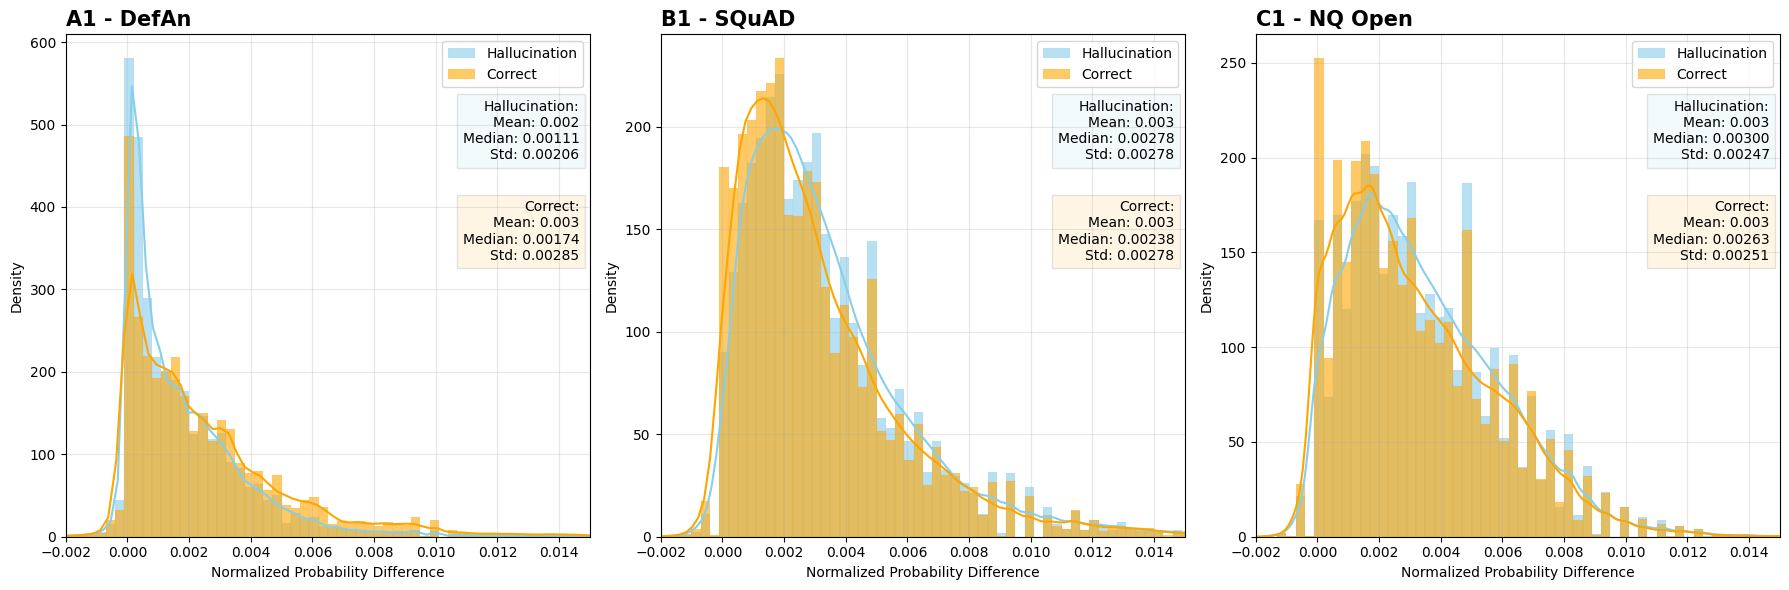

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def analyze_prob_diff_improved(df_list: list, dataset_names: list, xlim1, xlim2, bin_size: float = 0.0003) -> None:
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    for idx, (df, dataset_name) in enumerate(zip(df_list, dataset_names)):
        df['prob_diff_values'] = df['prob_diff_values'].apply(eval)

        df['normalized_prob_diff_values'] = df['prob_diff_values'].apply(lambda x: np.array(x) / len(x))

        hallucination_df = df[df['verdict'] == 'Hallucination']
        correct_df = df[df['verdict'] == 'Correct']

        hallucination_values = np.concatenate(hallucination_df['normalized_prob_diff_values'].values)
        correct_values = np.concatenate(correct_df['normalized_prob_diff_values'].values)

        sns.histplot(hallucination_values, bins=np.arange(-0.4, 0.4 + bin_size, bin_size),
                     kde=True, stat="density", alpha=0.6, color="skyblue", label="Hallucination", ax=axs[idx])
        sns.histplot(correct_values, bins=np.arange(-0.4, 0.4 + bin_size, bin_size),
                     kde=True, stat="density", alpha=0.6, color="orange", label="Correct", ax=axs[idx])

        axs[idx].set_xlabel('Normalized Probability Difference')
        axs[idx].set_ylabel('Density')
        axs[idx].legend()
        axs[idx].grid(True, alpha=0.3)
        axs[idx].set_xlim(xlim1, xlim2)
        title_let = ['A1', 'B1', 'C1']
        axs[idx].set_title(f"{title_let[idx]} - {dataset_name}", loc='left', fontweight='bold', fontsize=15)

        for i, (values, label, color) in enumerate(zip([hallucination_values, correct_values],
                                                   ['Hallucination', 'Correct'],
                                                   ['skyblue', 'orange'])):
            mean = np.mean(values)
            median = np.median(values)
            std = np.std(values)
            axs[idx].text(0.98, 0.87 - i*0.2, f'{label}:\nMean: {mean:.3f}\nMedian: {median:.5f}\nStd: {std:.5f}',
                    transform=axs[idx].transAxes, ha='right', va='top',
                    bbox=dict(facecolor=color, alpha=0.1))

    plt.tight_layout()
    plt.show()

df_list = [train_defan.copy(), train_squad.copy(), train_nq.copy()]
dataset_names = ['DefAn', 'SQuAD', 'NQ Open']
analyze_prob_diff_improved(df_list, dataset_names, xlim1=-0.002, xlim2=0.015)


In [ ]:
train_squad.head(1)

,row,id,input,output,correct_answer,verdict,tokens,cosine_values,prob_diff_values,attributions_full,context
0,5356,5725c79b38643c19005accdd,How many rooms does The Radisson Montevideo have?,The Radisson Montevideo has 232 rooms.,"{'text': ['232'], 'answer_start': [474]}",Correct,"['How', 'many', 'rooms', 'does', 'The', 'Rad',...","[0.04, 0.04, 0.06, 0.06, 0.08, 0.08, 0.08, 0.0...","[0.08, 0.08, 0.11, 0.11, 0.13, 0.14, 0.14, 0.1...","[{'matrix_id': 0, 'data': [{'index': 'How (0)'...","Montevideo has over 50 hotels, mostly located ..."


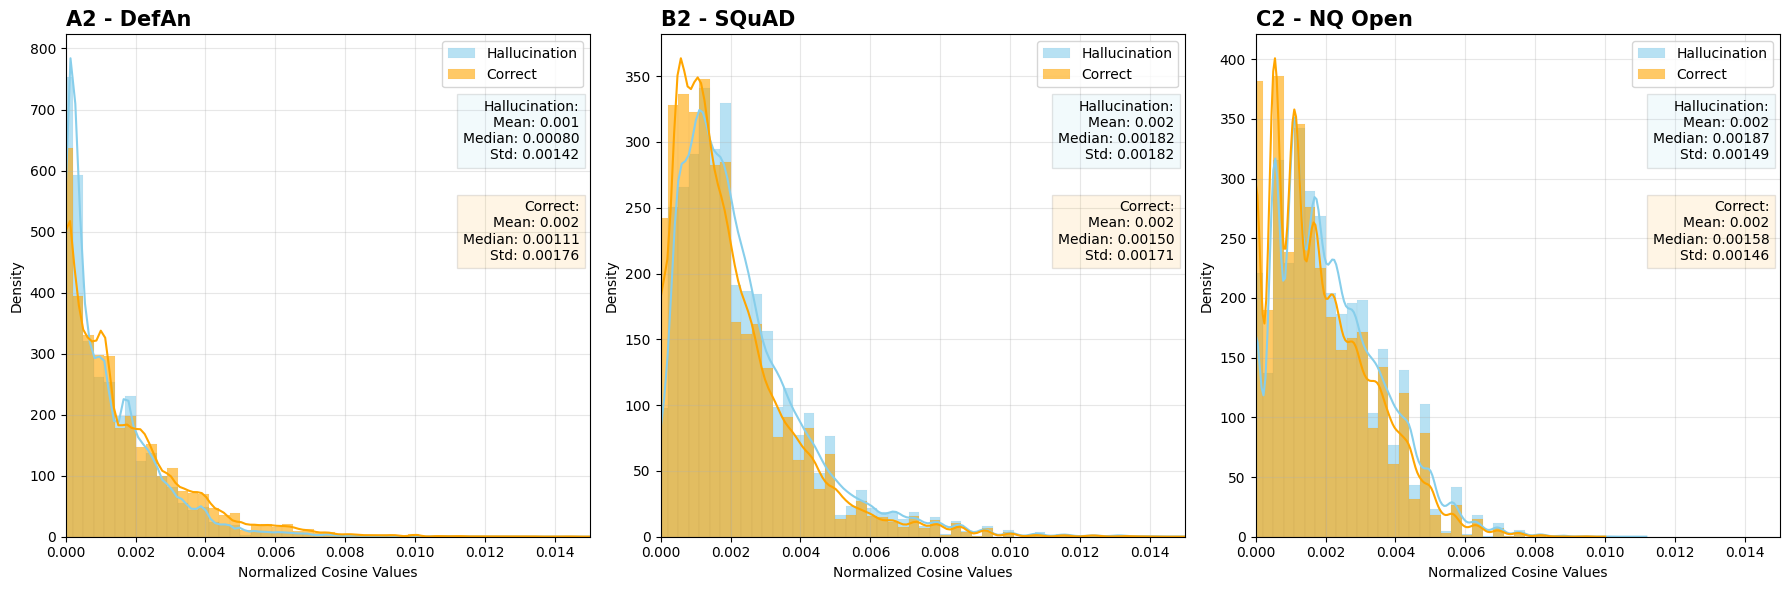

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def analyze_cosine_improved(df_list: list, dataset_names: list, xlim1, xlim2, bin_size: float = 0.0003) -> None:
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    for idx, (df, dataset_name) in enumerate(zip(df_list, dataset_names)):
        df['cosine_values'] = df['cosine_values'].apply(eval)

        df['normalized_cosine_values_values'] = df['cosine_values'].apply(lambda x: np.array(x) / len(x))

        hallucination_df = df[df['verdict'] == 'Hallucination']
        correct_df = df[df['verdict'] == 'Correct']

        hallucination_values = np.concatenate(hallucination_df['normalized_cosine_values_values'].values)
        correct_values = np.concatenate(correct_df['normalized_cosine_values_values'].values)

        sns.histplot(hallucination_values, bins=np.arange(-0.4, 0.4 + bin_size, bin_size),
                     kde=True, stat="density", alpha=0.6, color="skyblue", label="Hallucination", ax=axs[idx])
        sns.histplot(correct_values, bins=np.arange(-0.4, 0.4 + bin_size, bin_size),
                     kde=True, stat="density", alpha=0.6, color="orange", label="Correct", ax=axs[idx])

        axs[idx].set_xlabel('Normalized Cosine Values')
        axs[idx].set_ylabel('Density')
        axs[idx].legend()
        axs[idx].grid(True, alpha=0.3)
        axs[idx].set_xlim(xlim1, xlim2)
        title_let = ['A2', 'B2', 'C2']
        axs[idx].set_title(f"{title_let[idx]} - {dataset_name}", loc='left', fontweight='bold', fontsize=15)
        for i, (values, label, color) in enumerate(zip([hallucination_values, correct_values],
                                                   ['Hallucination', 'Correct'],
                                                   ['skyblue', 'orange'])):
            mean = np.mean(values)
            median = np.median(values)
            std = np.std(values)
            axs[idx].text(0.98, 0.87 - i*0.2, f'{label}:\nMean: {mean:.3f}\nMedian: {median:.5f}\nStd: {std:.5f}',
                    transform=axs[idx].transAxes, ha='right', va='top',
                    bbox=dict(facecolor=color, alpha=0.1))

    plt.tight_layout()
    plt.show()

df_list = [train_defan.copy(), train_squad.copy(), train_nq.copy()]
dataset_names = ['DefAn', 'SQuAD', 'NQ Open']
analyze_cosine_improved(df_list, dataset_names, xlim1=00.000, xlim2=0.015)
